# Implementation of machine learning on Vacation Data

## Import the required Libraries

In [1]:
# Import numpy
import numpy as np

# Import pandas
import pandas as pd

#Import matplotlib
import matplotlib.pyplot as plt

#Import seaborn
import seaborn as sns

## Load the dataset and perform data overview

In [2]:
# Read the data using pandas
df_vacations_data = pd.read_excel('vacation_data.xlsx')

In [3]:
# Show the first five observations
df_vacations_data.head()

,Gender,Age,Education,Occupation,State,relationship_status,obligation_rating,obligation_category,NEP,vacation_behaviour,...,life_style_of_the_local_people,intense_experience_of_nature,cosiness/familiar_atmosphere,maintain_unspoilt_surroundings,everything_organised,unspoilt_nature/natural_landscape,cultural_offers,change_of_surroundings,Income(k$),Expenditure
0,Female,25.0,6.0,Clerical or service worker,VIC,single,4.80,Q4,3.20,2.07,...,no,no,no,no,no,no,no,no,15.0,39.0
1,Female,31.0,8.0,professional,WA,married,3.30,Q1,3.40,2.00,...,yes,no,no,no,no,no,no,yes,15.0,81.0
2,Male,21.0,3.0,NaN,NSW,single,3.40,Q2,3.07,1.23,...,yes,no,yes,no,no,no,yes,no,16.0,6.0
3,Female,18.0,2.0,unemployed,NSW,single,2.63,Q1,3.40,2.17,...,no,yes,no,no,no,no,no,yes,16.0,77.0
4,Male,61.0,3.0,retired,WA,married,3.40,Q2,3.73,1.72,...,yes,no,no,yes,no,no,no,no,17.0,40.0


In [4]:
# Show the last five observations
df_vacations_data.tail()

,Gender,Age,Education,Occupation,State,relationship_status,obligation_rating,obligation_category,NEP,vacation_behaviour,...,life_style_of_the_local_people,intense_experience_of_nature,cosiness/familiar_atmosphere,maintain_unspoilt_surroundings,everything_organised,unspoilt_nature/natural_landscape,cultural_offers,change_of_surroundings,Income(k$),Expenditure
995,Male,51.0,3.0,manager or administrator,VIC,separated or divorced,2.37,Q1,3.40,2.57,...,yes,yes,no,yes,no,no,yes,yes,NaN,NaN
996,Male,58.0,4.0,small business owner,WA,living with a partner,4.40,Q4,3.87,3.50,...,yes,yes,no,yes,no,yes,yes,no,NaN,NaN
997,Male,41.0,8.0,professional,QLD,married,3.87,Q3,3.40,2.56,...,no,no,no,no,no,no,no,yes,NaN,NaN
998,Female,42.0,3.0,professional,VIC,living with a partner,4.00,Q3,3.13,4.70,...,no,no,no,no,no,no,no,no,NaN,NaN
999,Female,32.0,6.0,manager or administrator,WA,living with a partner,2.33,Q1,3.60,2.73,...,yes,no,no,no,no,no,no,yes,NaN,NaN


In [5]:
# Show the size of the data
df_vacations_data.shape

(1000, 32)

**INTERPRETATION**
 - We have 1000 observation
 - We have 32 attributes 

In [6]:
# Show the columns of the data
df_vacations_data.columns

Index(['Gender', 'Age', 'Education', 'Occupation', 'State',
       'relationship_status', 'obligation_rating', 'obligation_category',
       'NEP', 'vacation_behaviour', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings', 'Income(k$)', 'Expenditure'],
      dtype='object')

**COLUMN INFO**
- Gender: Gender of the person who is going for vacation (e.g., Male, Female, Non-binary, etc.).
- Age: Age of the individual, likely in years.
- Education: Level of education attained by the individual (e.g., High School, Bachelor’s Degree, Master’s Degree, etc.).
- Occupation: Job or profession of the individual.
- State: State or region where the individual resides.
- Relationship.Status: Relationship status of the individual (e.g., Single, Married, Divorced, etc.).
- Obligation: Indicates some form of obligation (e.g., financial, familial, or other responsibilities). Exact meaning depends on the dataset context.
- Obligation2: Another column related to obligations, possibly a secondary or additional type of obligation.
- NEP: Likely an acronym or specific term related to the dataset. Without additional context, it’s unclear what this represents (e.g., "Net Effective Price," "Non-Exempt Personnel," etc.).
- Vacation.Behaviour**: Describes the individual’s behavior or preferences related to vacations (e.g., frequency, type of vacations, etc.).
- rest and relax: Preference for seeking rest and relaxation during vacations.
- luxury / be spoilt: Preference for luxury or being pampered during vacations.
- do sports: Preference for engaging in sports or physical activities during vacations.
- excitement, a challenge: Preference for seeking excitement or challenges during vacations.
- not exceed planned budget: Preference for staying within a planned budget during vacations.
- realise creativity: Preference for activities that allow the individual to express or realize their creativity during vacations.
- fun and entertainment: Preference for fun and entertainment during vacations.
- good company: Preference for spending vacations with good company (e.g., friends, family).
- health and beauty: Preference for activities related to health and beauty during vacations (e.g., spa treatments, wellness activities).
- free-and-easy-going: Preference for a relaxed, unstructured, or spontaneous vacation style.
- entertainment facilities: Preference for vacations that include access to entertainment facilities (e.g., resorts, theme parks).
- not care about prices: Indicates that the individual does not prioritize cost when planning vacations.
- life style of the local people: Preference for experiencing or learning about the lifestyle of local people during vacations.
- intense experience of nature: Preference for immersive or intense experiences in nature during vacations.
- cosiness/familiar atmosphere: Preference for cozy or familiar environments during vacations.
- maintain unspoilt surroundings: Preference for vacations that prioritize preserving or enjoying unspoiled natural surroundings.
- everything organised: Preference for vacations where everything is pre-organized or planned.
- unspoilt nature/natural landscape: Preference for vacations that focus on unspoiled natural landscapes.
- cultural offers: Preference for vacations that include cultural activities or experiences (e.g., museums, historical sites).
- change of surroundings: Preference for vacations that provide a change of environment or scenery.
- Income(k$): The individual’s income, likely in thousands of dollars (k$).
- Expenditure: The individual’s expenditure, possibly related to vacations or general spending.

In [7]:
# Show the datatype of the data (Information of the data)
df_vacations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1000 non-null   object 
 1   Age                                1000 non-null   float64
 2   Education                          992 non-null    float64
 3   Occupation                         941 non-null    object 
 4   State                              1000 non-null   object 
 5   relationship_status                996 non-null    object 
 6   obligation_rating                  1000 non-null   float64
 7   obligation_category                1000 non-null   object 
 8   NEP                                1000 non-null   float64
 9   vacation_behaviour                 975 non-null    float64
 10  rest_and_relax                     1000 non-null   object 
 11  luxury_or_be_spoilt                1000 non-null   object

**INTERPRETATION**
 - We have 7 numerical columns
 - We have 25 categorical columns
 - Space utilized by the data is 250.1+ KB
 - We have null records in the data

In [8]:
# Showcase the basic statistics of the data
df_vacations_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,44.168000,14.539228,18.00,32.00,42.00,57.00,105.0
Education,992.0,4.813508,2.422252,1.00,3.00,6.00,7.00,8.0
obligation_rating,1000.0,3.734580,0.635835,1.00,3.37,3.80,4.20,5.0
NEP,1000.0,3.648640,0.561130,1.73,3.27,3.67,4.07,5.0
vacation_behaviour,975.0,2.962800,0.668444,1.23,2.47,2.94,3.43,4.9
Income(k$),200.0,60.560000,26.264721,15.00,41.50,61.50,78.00,137.0
Expenditure,200.0,50.200000,25.823522,1.00,34.75,50.00,73.00,99.0


**INTERPRETATION**
 - We don't have outliers in the data

## Data Preprocessing

### Data Cleaning

In [9]:
# Show first five observations of the data
df_vacations_data.head()

,Gender,Age,Education,Occupation,State,relationship_status,obligation_rating,obligation_category,NEP,vacation_behaviour,...,life_style_of_the_local_people,intense_experience_of_nature,cosiness/familiar_atmosphere,maintain_unspoilt_surroundings,everything_organised,unspoilt_nature/natural_landscape,cultural_offers,change_of_surroundings,Income(k$),Expenditure
0,Female,25.0,6.0,Clerical or service worker,VIC,single,4.80,Q4,3.20,2.07,...,no,no,no,no,no,no,no,no,15.0,39.0
1,Female,31.0,8.0,professional,WA,married,3.30,Q1,3.40,2.00,...,yes,no,no,no,no,no,no,yes,15.0,81.0
2,Male,21.0,3.0,NaN,NSW,single,3.40,Q2,3.07,1.23,...,yes,no,yes,no,no,no,yes,no,16.0,6.0
3,Female,18.0,2.0,unemployed,NSW,single,2.63,Q1,3.40,2.17,...,no,yes,no,no,no,no,no,yes,16.0,77.0
4,Male,61.0,3.0,retired,WA,married,3.40,Q2,3.73,1.72,...,yes,no,no,yes,no,no,no,no,17.0,40.0


#### Perform the renaming action

In [10]:
# Show the columns in the data
df_vacations_data.columns

Index(['Gender', 'Age', 'Education', 'Occupation', 'State',
       'relationship_status', 'obligation_rating', 'obligation_category',
       'NEP', 'vacation_behaviour', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings', 'Income(k$)', 'Expenditure'],
      dtype='object')

**INTERPRETATION**
 - Column names are already in good structure so there is no need of renaming

### Null value treatment

In [11]:
# Fetch the null records present in the data (count)
df_vacations_data.isnull().sum()

Gender                                 0
Age                                    0
Education                              8
Occupation                            59
State                                  0
relationship_status                    4
obligation_rating                      0
obligation_category                    0
NEP                                    0
vacation_behaviour                    25
rest_and_relax                         0
luxury_or_be_spoilt                    0
do_sports                              0
excitement_and_challenge               0
not_exceed_planned_budget              0
realise_creativity                     0
fun_and_entertainment                  0
good_company                           0
health_and_beauty                      0
free_and_easy_going                    0
entertainment_facilities               0
not_care_about_prices                  0
life_style_of_the_local_people         0
intense_experience_of_nature           0
cosiness/familia

**INTERPRETATION**
 - We have 8 missing records in Education column
 - We have 59 missing records in Occupation column
 - We have 8 missing records in relationship_status column
 - We have 25 missing records in vacation_behaviour column
 - We have 800 missing records in Income_Dollar_k column
 - We have 800 missing records in Expenditure_dollar_k column

In [12]:
# Find the percentage of the missing records
df_vacations_data.isnull().sum()/len(df_vacations_data) * 100

Gender                                0.0
Age                                   0.0
Education                             0.8
Occupation                            5.9
State                                 0.0
relationship_status                   0.4
obligation_rating                     0.0
obligation_category                   0.0
NEP                                   0.0
vacation_behaviour                    2.5
rest_and_relax                        0.0
luxury_or_be_spoilt                   0.0
do_sports                             0.0
excitement_and_challenge              0.0
not_exceed_planned_budget             0.0
realise_creativity                    0.0
fun_and_entertainment                 0.0
good_company                          0.0
health_and_beauty                     0.0
free_and_easy_going                   0.0
entertainment_facilities              0.0
not_care_about_prices                 0.0
life_style_of_the_local_people        0.0
intense_experience_of_nature      

**INTERPRETATION**
 - As per the first law the observations we need to remove are Education, Occupation, relationship_status, vacation_behaviour
 - As per the second law there is no as such column where we need to impute the missing records
 - As per the third law the columns we need to remove from the data are  Income_Dollar_k, Expenditure_dollar_k

In [13]:
# Perform the action of attributes removal
df_vacations_data.drop(['Income(k$)', 'Expenditure'], axis=1, inplace=True)

In [14]:
# Perform the action of observation removal
df_vacations_data.dropna(inplace=True)

In [15]:
# Perform the authentic check
df_vacations_data.isnull().sum()/len(df_vacations_data)*100

Gender                               0.0
Age                                  0.0
Education                            0.0
Occupation                           0.0
State                                0.0
relationship_status                  0.0
obligation_rating                    0.0
obligation_category                  0.0
NEP                                  0.0
vacation_behaviour                   0.0
rest_and_relax                       0.0
luxury_or_be_spoilt                  0.0
do_sports                            0.0
excitement_and_challenge             0.0
not_exceed_planned_budget            0.0
realise_creativity                   0.0
fun_and_entertainment                0.0
good_company                         0.0
health_and_beauty                    0.0
free_and_easy_going                  0.0
entertainment_facilities             0.0
not_care_about_prices                0.0
life_style_of_the_local_people       0.0
intense_experience_of_nature         0.0
cosiness/familia

In [16]:
# Check the changing number of observations in data due to null value treatment
df_vacations_data.shape

(912, 30)

**INTERPRETATION**
 - Droping the null records is not impacting on records present in the data, the difference is only 88 from original

## Null value treatment done

## EDA (Exploratory Data Analysis)

## Univariate Analysis

In [17]:
# Show the first five observations of the data
df_vacations_data.head()

,Gender,Age,Education,Occupation,State,relationship_status,obligation_rating,obligation_category,NEP,vacation_behaviour,...,entertainment_facilities,not_care_about_prices,life_style_of_the_local_people,intense_experience_of_nature,cosiness/familiar_atmosphere,maintain_unspoilt_surroundings,everything_organised,unspoilt_nature/natural_landscape,cultural_offers,change_of_surroundings
0,Female,25.0,6.0,Clerical or service worker,VIC,single,4.80,Q4,3.20,2.07,...,no,no,no,no,no,no,no,no,no,no
1,Female,31.0,8.0,professional,WA,married,3.30,Q1,3.40,2.00,...,no,no,yes,no,no,no,no,no,no,yes
3,Female,18.0,2.0,unemployed,NSW,single,2.63,Q1,3.40,2.17,...,yes,no,no,yes,no,no,no,no,no,yes
4,Male,61.0,3.0,retired,WA,married,3.40,Q2,3.73,1.72,...,no,no,yes,no,no,yes,no,no,no,no
5,Female,63.0,7.0,retired,QLD,married,4.40,Q4,4.27,3.30,...,no,no,no,no,yes,no,no,no,no,no


In [18]:
# Segregate the data based on the data type

# Numerical Data
df_numerical = df_vacations_data.select_dtypes(include='number')

# Show the first five observations of Numerical Data
df_numerical.head()

,Age,Education,obligation_rating,NEP,vacation_behaviour
0,25.0,6.0,4.80,3.20,2.07
1,31.0,8.0,3.30,3.40,2.00
3,18.0,2.0,2.63,3.40,2.17
4,61.0,3.0,3.40,3.73,1.72
5,63.0,7.0,4.40,4.27,3.30


In [19]:
# Categorical Data
df_categorical = df_vacations_data.select_dtypes(include='object')

# Show the first five observations of Categorical Data
df_categorical.head()

,Gender,Occupation,State,relationship_status,obligation_category,rest_and_relax,luxury_or_be_spoilt,do_sports,excitement_and_challenge,not_exceed_planned_budget,...,entertainment_facilities,not_care_about_prices,life_style_of_the_local_people,intense_experience_of_nature,cosiness/familiar_atmosphere,maintain_unspoilt_surroundings,everything_organised,unspoilt_nature/natural_landscape,cultural_offers,change_of_surroundings
0,Female,Clerical or service worker,VIC,single,Q4,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
1,Female,professional,WA,married,Q1,yes,yes,no,no,no,...,no,no,yes,no,no,no,no,no,no,yes
3,Female,unemployed,NSW,single,Q1,yes,yes,no,no,yes,...,yes,no,no,yes,no,no,no,no,no,yes
4,Male,retired,WA,married,Q2,yes,no,no,no,yes,...,no,no,yes,no,no,yes,no,no,no,no
5,Female,retired,QLD,married,Q4,yes,no,no,no,yes,...,no,no,no,no,yes,no,no,no,no,no


### Perform the Univariate Analysis on numerical data

In [20]:
# Show the first five observations of Numerical Data
df_numerical.head()

,Age,Education,obligation_rating,NEP,vacation_behaviour
0,25.0,6.0,4.80,3.20,2.07
1,31.0,8.0,3.30,3.40,2.00
3,18.0,2.0,2.63,3.40,2.17
4,61.0,3.0,3.40,3.73,1.72
5,63.0,7.0,4.40,4.27,3.30


In [21]:
# Show the columns present in the numerical data
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

##### Age

In [22]:
# Show the minimum
df_numerical.Age.min()

18.0

In [23]:
# Show the maximum
df_numerical.Age.max()

105.0

In [24]:
# Show the average(mean)
round(df_numerical.Age.mean(), 3)

44.225

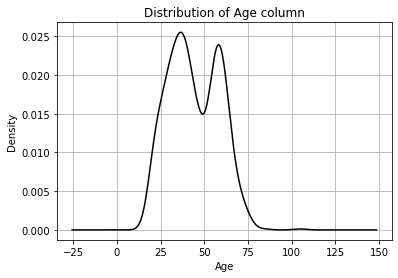

In [25]:
# Check the distribution(KDE Plot)
df_numerical.Age.plot(kind='kde', color='black')
plt.title('Distribution of Age column')
plt.xlabel('Age')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum age of the person going for vacation is 18 and maximum is 105
 - Average age of the person going for vacation is 44.225
 - In visualization we can see multimodal data, mostly we have two age groups who are travelling those are 25 to 50 and 55 to 70

In [26]:
# Show the columns in the numerical data
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

##### Education

In [27]:
# Show the minimum
df_numerical.Education.min()

1.0

In [28]:
# Show the maximum
df_numerical.Education.max()

8.0

In [29]:
# Show the average(mean)
round(df_numerical.Education.mean(), 3)

4.884

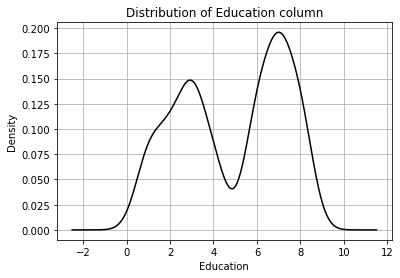

In [30]:
# Check the distribution(KDE Plot)
df_numerical.Education.plot(kind='kde', color='black')
plt.title('Distribution of Education column')
plt.xlabel('Education')
plt.grid()
plt.show()